In [1]:
import functools
import glob
import operator
import os

import numpy as np
import torch
from sklearn import preprocessing, model_selection

import config
import dataset




In [2]:
def run_training():
    image_files = glob.glob(os.path.join(config.DATA_DIR, "*.png"))
    targets_orig = [os.path.splitext(os.path.basename(i))[0] for i in image_files]

    targets = [[c for c in i] for i in targets_orig]
    targets_flat = functools.reduce(operator.iconcat, targets, [])
    # [j for i in targets for j in i ]
    lbl_enc = preprocessing.LabelEncoder()
    lbl_enc.fit(targets_flat)
    target_enc = [lbl_enc.transform(i) for i in targets]
    target_enc = np.array(target_enc) + 1

    train_images, test_images, train_targets, test_targets, train_orig_targets, test_orig_targets = model_selection.train_test_split(
        image_files, target_enc, targets_orig, test_size=0.1, random_state=42)

    train_data = dataset.CaptchaImageDataset(
        image_paths=train_images,
        targets=train_targets,
        resize=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH)
    )

    return train_data

In [6]:
train_data = run_training()

In [12]:
img_1 = train_data[0]['images'].numpy()
# * 255).astype(np.uint8))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


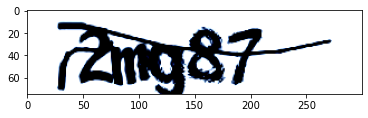

In [40]:
import matplotlib.pyplot as plt 
plt.imshow((img_1.transpose(1,2,0)))

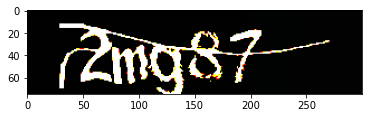

In [42]:
plt.imshow((img_1.transpose(1,2,0)).astype(np.uint8))

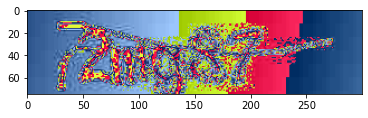

In [43]:
plt.imshow((img_1.transpose(1,2,0)*255).astype(np.uint8))

# Albumentations Normalise use below parameters

In [44]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

## Orignal Image

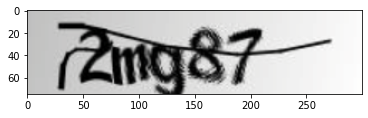

In [36]:
plt.imshow(np.array([((img_1[i,:,:]*std[i]+mean[i])*255).astype(np.uint8) for i in range(3)]).transpose(1,2,0))
plt.show()